In [1]:
from sklearn.datasets import make_circles
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
from sklearn.base import clone
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plotDataset(X, y):
  for label in np.unique(y):
    plt.scatter(X[y == label, 0], X[y == label, 1], label=label)
  plt.legend()
  plt.show()


def plotEstimator(trX, trY, teX, teY, estimator, title=''):
  estimator = clone(estimator).fit(trX, trY)
  h = .02
  x_min, x_max = teX[:, 0].min() - .5, teX[:, 0].max() + .5
  y_min, y_max = teX[:, 1].min() - .5, teX[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  Z = estimator.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
  plt.scatter(teX[:, 0], teX[:, 1], c=teY, cmap=cm_bright, edgecolors='k', alpha=0.6)
  # plt.legend()
  plt.title(title)
  plt.show()

In [3]:
RANDOM_STATE = 0

In [4]:
X_circles, y_circles = make_circles(300, noise=0.1, random_state=RANDOM_STATE)
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X_circles, y_circles, test_size=0.2, 
                                                                                    random_state=RANDOM_STATE)
X_cls, y_cls = make_classification(300, random_state=RANDOM_STATE)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2,
                                                                    random_state=RANDOM_STATE)

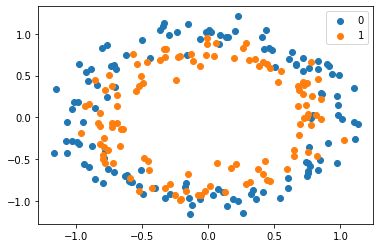

In [5]:
plotDataset(X_train_circles, y_train_circles)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

0.6666666666666666


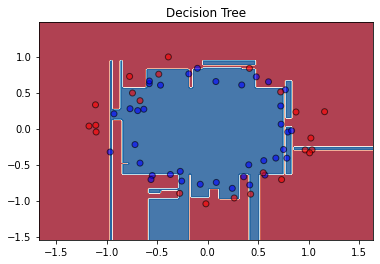

In [8]:
dt_clf = DecisionTreeClassifier(random_state=RANDOM_STATE, criterion='gini')
dt_clf.fit(X_train_circles, y_train_circles)

y_pred_circles = dt_clf.predict(X_test_circles)
dt_acc = accuracy_score(y_test_circles, y_pred_circles)

plotEstimator(X_train_circles, y_train_circles, X_test_circles, y_test_circles, 
              dt_clf, 'Decision Tree')

print(dt_acc)

0.75


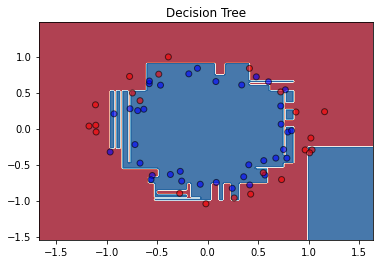

In [9]:
dt_cls = DecisionTreeClassifier(random_state=RANDOM_STATE, criterion='entropy')
dt_cls.fit(X_train_circles, y_train_circles)

y_pred_circles = dt_cls.predict(X_test_circles)
dt_acc = accuracy_score(y_test_circles, y_pred_circles)

print(dt_acc)
plotEstimator(X_train_circles, y_train_circles, X_test_circles, y_test_circles, 
              dt_cls, 'Decision Tree')

In [10]:
dt_clf = DecisionTreeClassifier(random_state=RANDOM_STATE, criterion='entropy')
dt_clf.fit(X_train_cls, y_train_cls)

y_pred_cls = dt_clf.predict(X_test_cls)
dt_acc = accuracy_score(y_test_cls, y_pred_cls)

dt_acc

0.9833333333333333

In [21]:
from sklearn.model_selection import KFold
from sklearn.base import clone

def plotKFeatureAcc(clf, X, y, X_test, y_test, n_feats, k=4):
  curr_clf = clone(clf)
  curr_clf.fit(X, y)
  importances = curr_clf.feature_importances_
  imp_feats_indices = importances.argsort()[::-1][:n_feats]

  test_accs = np.zeros((n_feats, 1))
  
  for i in range(n_feats):
    curr_clf.fit(X[:, imp_feats_indices[:i+1]], y)
    y_pred = curr_clf.predict(X_test[:, imp_feats_indices[:i+1]])
    test_accs[i] = accuracy_score(y_test, y_pred)

  kf = KFold(n_splits=k)
  kf.get_n_splits(X)

  accs = np.zeros((n_feats, 1))
  for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    for i in range(n_feats):
      curr_clf.fit(X_train[:, imp_feats_indices[:i+1]], y_train)
      y_pred = curr_clf.predict(X_test[:, imp_feats_indices[:i+1]])
      acc = accuracy_score(y_test, y_pred)
      accs[i] += acc   
   
  accs = accs / k
  
  plt.plot(range(n_feats), test_accs)
  plt.xticks(range(n_feats), imp_feats_indices[:n_feats])
  plt.xlabel("Feature Name/Index")
  plt.ylabel("Test Accuracy")
  plt.show()

  plt.plot(range(n_feats), accs)
  plt.xticks(range(n_feats), imp_feats_indices[:n_feats])
  plt.xlabel("Feature Name/Index")
  plt.ylabel("Validation Accuracy")

  

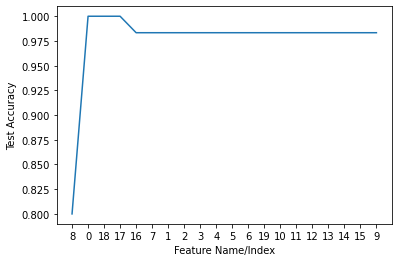

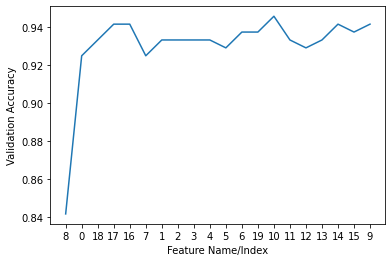

In [22]:
plotKFeatureAcc(dt_clf, X_train_cls, y_train_cls, X_test_cls, y_test_cls, 20)

# Bagging

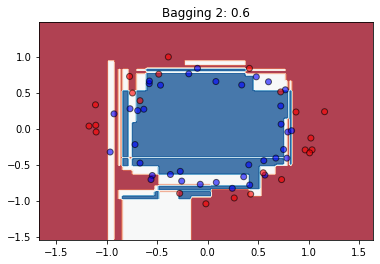

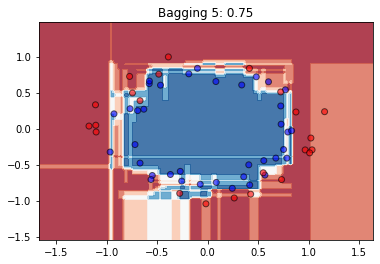

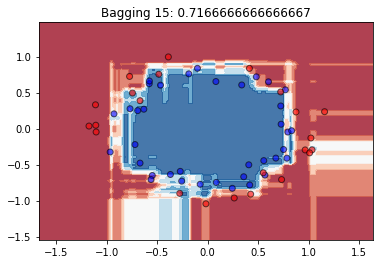

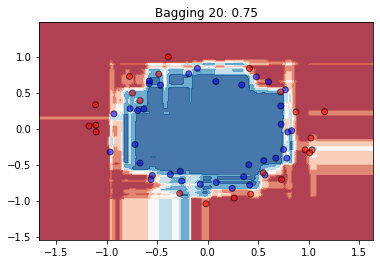

In [23]:
from sklearn.ensemble import BaggingClassifier

n_est = [2, 5, 15, 20]
for n in n_est:
  estimator = BaggingClassifier(n_estimators=n, random_state=RANDOM_STATE)
  score = estimator.fit(X_train_circles, y_train_circles).score(X_test_circles,
                                                                y_test_circles)
  plotEstimator(X_train_circles, y_train_circles, X_test_circles, y_test_circles,
                estimator, f'Bagging {n}: {score}')

# Random Forest




In [24]:
from sklearn.ensemble import RandomForestClassifier

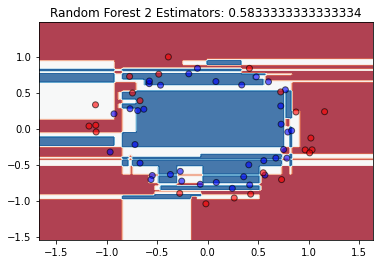

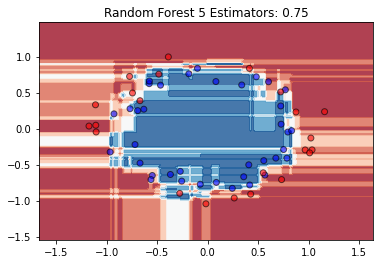

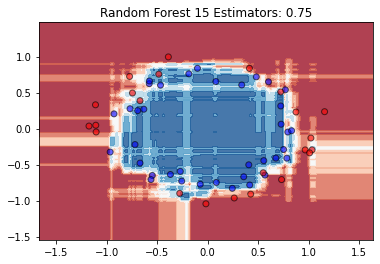

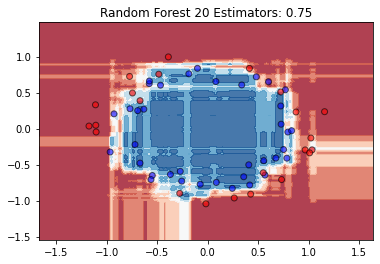

In [25]:
n_est = [2, 5, 15, 20]
for n in n_est:
  rf_clf = RandomForestClassifier(n_estimators=n, random_state=RANDOM_STATE)
  score = rf_clf.fit(X_train_circles, y_train_circles).score(X_test_circles,
                                                                y_test_circles)
  plotEstimator(X_train_circles, y_train_circles, X_test_circles, y_test_circles,
                rf_clf, f'Random Forest {n} Estimators: {score}')

# Boosting

In [26]:
from sklearn.ensemble import AdaBoostClassifier
import itertools

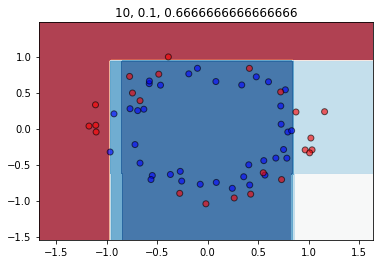

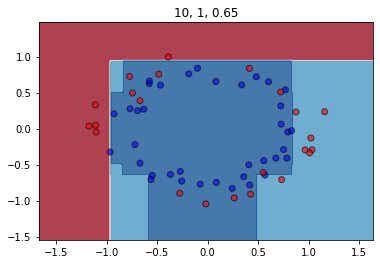

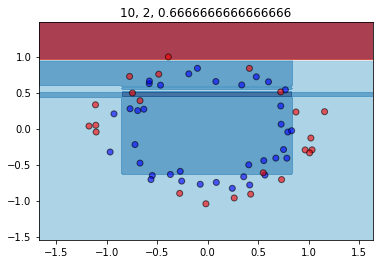

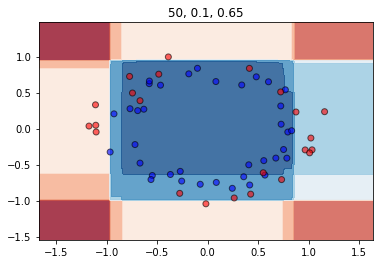

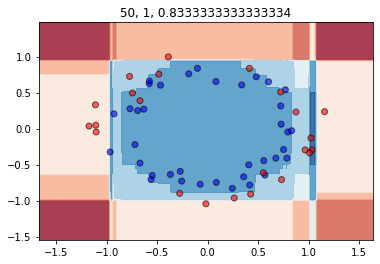

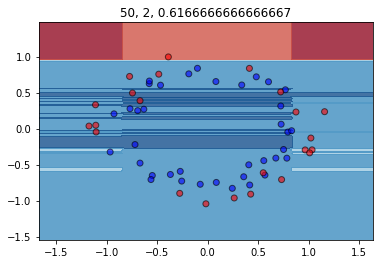

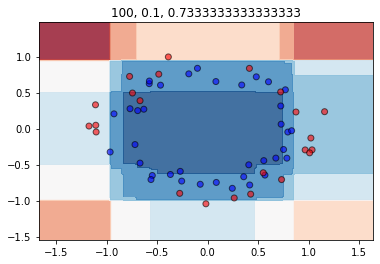

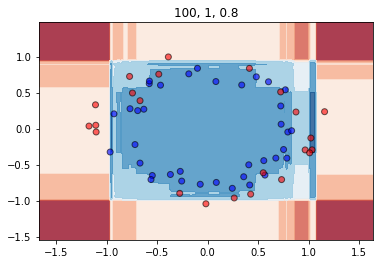

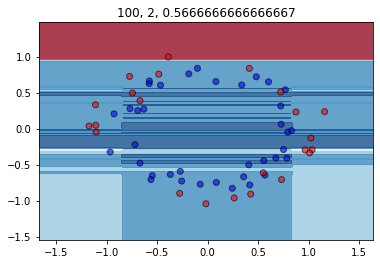

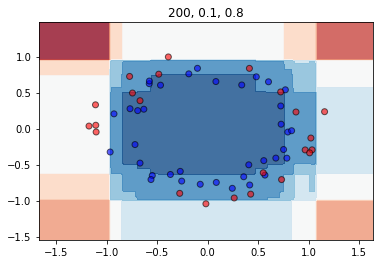

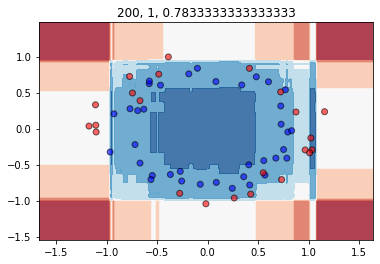

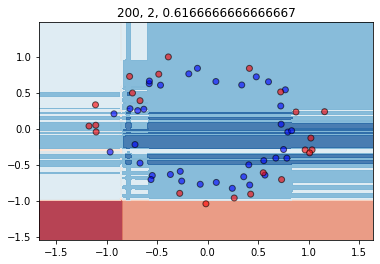

In [30]:
n_est_list = [10, 50, 100, 200]
lr_list = [0.1, 1, 2]

for n_est, lr in itertools.product(n_est_list, lr_list):
  rf_clf = AdaBoostClassifier(n_estimators=n_est, learning_rate=lr, 
                              random_state=RANDOM_STATE)
  score = rf_clf.fit(X_train_circles, y_train_circles).score(X_test_circles,
                                                                y_test_circles)
  plotEstimator(X_train_circles, y_train_circles, X_test_circles, y_test_circles,
                rf_clf, f'{n_est}, {lr}, {score}')

# Stacking

In [39]:
from sklearn.ensemble import StackingClassifier

def getClfName(clf):
    return clf.__class__.__name__

def stackClassifiers(X_train, X_test, y_train, y_test, classifiers, aggregator):
  stacking = StackingClassifier([(getClfName(clf), clone(clf)) for clf in classifiers], 
                                clone(aggregator), n_jobs=-1)
  stacking.fit(X_train, y_train)
  y_pred = stacking.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  plotEstimator(X_train, y_train, X_test, y_test, stacking, 
                f'Stacking (Aggregator {getClfName(aggregator)}): {acc}')
  #print(f'Stacking (Aggregator {getClfName(aggregator)}): {acc}')

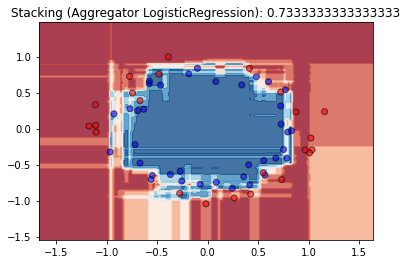

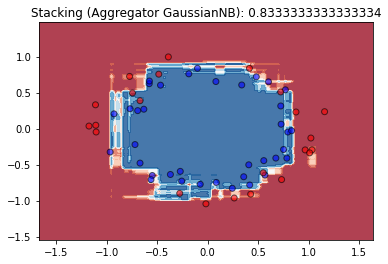

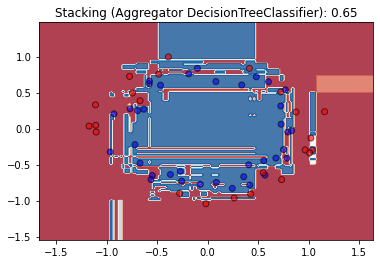

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

clfs = [DecisionTreeClassifier(random_state=RANDOM_STATE, criterion='entropy'), 
        BaggingClassifier(n_estimators=5, random_state=RANDOM_STATE), 
        RandomForestClassifier(n_estimators=5, random_state=RANDOM_STATE),
        AdaBoostClassifier(n_estimators=200, learning_rate=0.1, 
                              random_state=RANDOM_STATE)
        ]
aggregators = [LogisticRegression(random_state=RANDOM_STATE), GaussianNB(),
               DecisionTreeClassifier(random_state=RANDOM_STATE)]

for agg in aggregators:
  stackClassifiers(X_train_circles, X_test_circles, y_train_circles, y_test_circles, clfs, agg)